In [1]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import pywt
import seaborn as sns
import numpy as np
import pandas as pd
import waipy
import os

In [2]:
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'facies_vectors.csv'
training_data = pd.read_csv(filename)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [3]:
grouped = training_data.groupby(['Well Name'])
data = grouped.get_group('SHANKLE').GR
depth = grouped.get_group('SHANKLE').Depth

In [4]:
data_norm = waipy.normalize(data)

In [5]:
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))

Lag-1 autocorrelation = 0.90


In [6]:
result = waipy.cwt(data_norm, 0.25, 1, 0.5, 1, 16, alpha, 6, mother='Morlet',name='test')

/Users/mablou/anaconda3/lib/python3.5/site-packages/waipy/cwt/wavetest.py:105: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n // 2):], np.fft.ifft(ondaleta)[np.ceil(n // 2):][::-1]), axis=0)
/Users/mablou/anaconda3/lib/python3.5/site-packages/waipy/cwt/wavetest.py:107: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n // 2):], np.fft.ifft(ondaleta).imag[np.ceil(n // 2):][::-1]), axis=0)


In [7]:
pwd

'/Users/mablou/Dropbox/2016-ml-contest_liamlearn'

/Users/mablou/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/mablou/anaconda3/lib/python3.5/site-packages/waipy/cwt/wavetest.py:129: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  f = -np.fft.fftfreq(n)[np.ceil(n / 2.):]
/Users/mablou/anaconda3/lib/python3.5/site-packages/waipy/cwt/wavetest.py:131: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sxx = sxx[np.ceil(n / 2.):]


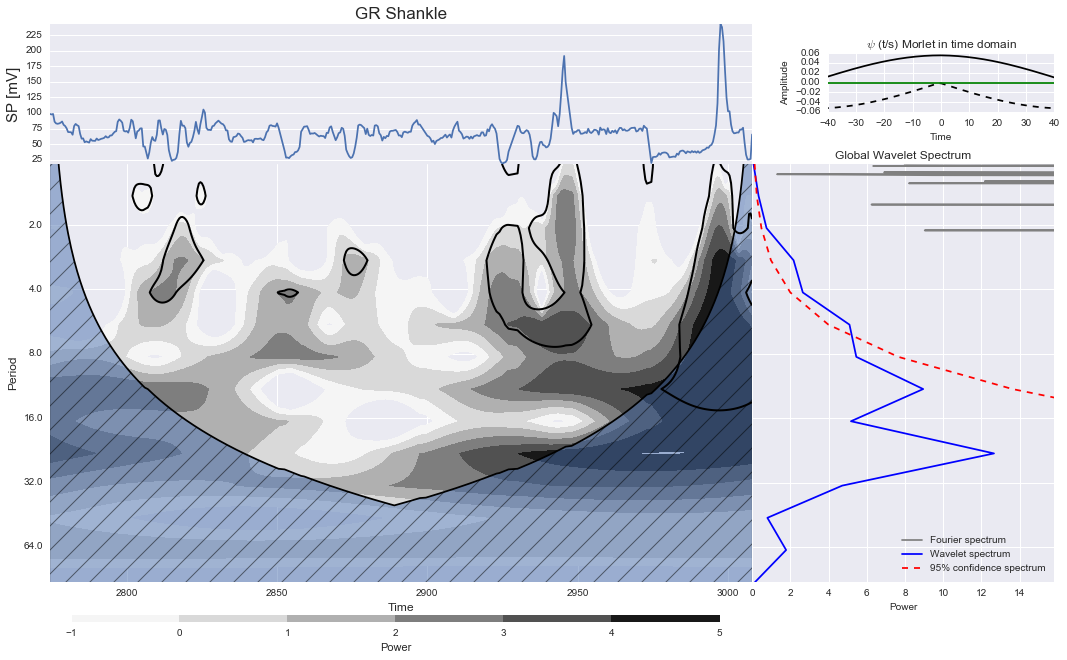

In [8]:
waipy.wavelet_plot('GR Shankle',depth,data,0.25,result)

In [12]:
4/0.25

16.0